In [8]:
import pandas as pd
from nba_api.stats.static import teams
import matplotlib.pyplot as plt 

In [2]:
def one_dict(list_dict):
    keys  = list_dict[0].keys()
    out_dict = { key:[] for key in keys }
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

In [4]:
dict_={'a':[11,21,31],'b':[12,22,32]}
dict_

{'a': [11, 21, 31], 'b': [12, 22, 32]}

In [5]:
df = pd.DataFrame(dict_)
df

,a,b
0,11,12
1,21,22
2,31,32


In [6]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [7]:
df.mean()

a    21.0
b    22.0
dtype: float64

In [10]:
nba_teams = teams.get_teams()
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [11]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [12]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [13]:
id_warriors=df_warriors[['id']].values[0][0]
#we now have an integer that can be used   to request the Warriors information 
id_warriors

1610612744

In [14]:
from nba_api.stats.endpoints import leaguegamefinder

In [17]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [18]:
games_home=games [games ['MATCHUP']=='GSW vs. TOR']
games_away=games [games ['MATCHUP']=='GSW @ TOR']

In [19]:
games_home.mean()['PLUS_MINUS']

3.730769230769231

In [20]:
games_away.mean()['PLUS_MINUS']

-0.6071428571428571

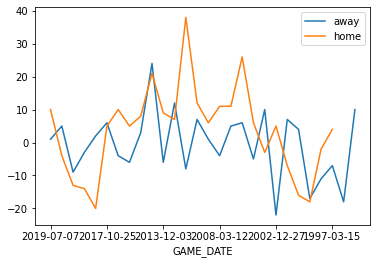

In [21]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

In [32]:
from ibm_watson import SpeechToTextV1
import json
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [33]:
url_s2t = "https://api.us-south.speech-to-text.watson.cloud.ibm.com/instances/01930bf9-e9c6-45fe-b620-c2ef0682d8de"

In [34]:
iam_apikey_s2t = "CZeGRa_M-xDtn03NP_dbks37QxW6SzsioU4aBviP28tW"

In [35]:
authenticator = IAMAuthenticator(iam_apikey_s2t)
s2t = SpeechToTextV1(authenticator=authenticator)
s2t.set_service_url(url_s2t)
s2t

In [36]:
filename = "PolynomialRegressionandPipelines.mp3"

In [37]:
with open(filename,mode="rb") as wav:
    response = s2t.recognize(audio=wav,content_type='audio/mp3')

In [38]:
response.result

{'result_index': 0,
 'results': [{'final': True,
   'alternatives': [{'transcript': 'in this video we will cover polynomial regression and pipelines ',
     'confidence': 0.94}]},
  {'final': True,
   'alternatives': [{'transcript': "what do we do when a linear model is not the best fit for our data let's look into another type of regression model the polynomial regression we transform our data into a polynomial then use linear regression to fit the parameters that we will discuss pipelines pipelines are way to simplify your code ",
     'confidence': 0.9}]},
  {'final': True,
   'alternatives': [{'transcript': "polynomial regression is a special case of the general linear regression this method is beneficial for describing curvilinear relationships what is a curvilinear relationship it's what you get by squaring or setting higher order terms of the predictor variables in the model transforming the data the model can be quadratic which means the predictor variable in the model is squar

In [39]:
from pandas.io.json import json_normalize

json_normalize(response.result['results'],"alternatives")

,transcript,confidence
0,in this video we will cover polynomial regress...,0.94
1,what do we do when a linear model is not the b...,0.90
2,polynomial regression is a special case of the...,0.95
3,the model can be cubic which means the predict...,0.95
4,there also exists higher order polynomial regr...,0.91
5,let's look at an example from our data we gene...,0.89
6,in python we do this by using the poly fit fun...,0.92
7,negative one point five five seven X. one cute...,0.90
8,consider the feature shown here applying the m...,0.90
9,pipeline sequentially perform a series of tran...,0.89


In [40]:
response

In [41]:
recognized_text=response.result['results'][0]["alternatives"][0]["transcript"]
type(recognized_text)

str

In [42]:
from ibm_watson import LanguageTranslatorV3

In [43]:
url_lt='https://api.us-south.language-translator.watson.cloud.ibm.com/instances/47e89ea3-cb98-4675-8f25-c65ecd3e3322'
apikey_lt='qR9vOQMI8in2hakj1g3zzcIGr5l9S4s733_DD70SAw2K'

In [44]:
version_lt='2020-08-26'

In [47]:
authenticator = IAMAuthenticator(apikey_lt)
language_translator = LanguageTranslatorV3(version=version_lt,authenticator=authenticator)
language_translator.set_service_url(url_lt)
language_translator

In [48]:
from pandas.io.json import json_normalize

json_normalize(language_translator.list_identifiable_languages().get_result(), "languages")

,language,name
0,af,Afrikaans
1,ar,Arabic
2,az,Azerbaijani
3,ba,Bashkir
4,be,Belarusian
...,...,...
71,uk,Ukrainian
72,ur,Urdu
73,vi,Vietnamese
74,zh,Simplified Chinese


In [50]:
translation_response = language_translator.translate(text=recognized_text, model_id='en-es')
translation_response

In [55]:
translation=translation_response.get_result()

In [56]:
spanish_translation =translation['translations'][0]['translation']
language_translator.translate(text=spanish_translation ,model_id='es-en').get_result()

{'translations': [{'translation': 'in this video we will cover the polynomial regression and the pipes '}],
 'word_count': 10,
 'character_count': 64}